In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras. models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow. keras.layers import Dropout, Flatten

In [2]:
mnist = tf.keras. datasets .mnist

In [3]:
(x_train, y_train) , (x_test, y_test ) = mnist. load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


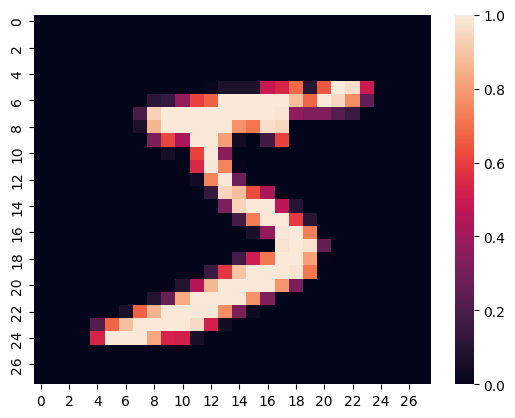

In [4]:
sns.heatmap(x_train[0])
plt.show()

In [5]:
model = Sequential([
Flatten(input_shape=(28, 28)), Dense(128, activation="relu"),
Dropout (0.2),
Dense(10)
])

In [7]:
predictions = model(x_train[ :1]).numpy()


In [8]:
predictions

array([[-0.05680081, -0.16186708,  0.03560252,  0.53106225,  0.56455463,
         0.38844302, -0.03308001,  0.23007143, -0.16996975, -0.10482278]],
      dtype=float32)

In [9]:
tf.nn.softmax (predictions).numpy()

array([[0.08050298, 0.07247401, 0.08829624, 0.14491645, 0.14985223,
        0.12565476, 0.08243541, 0.10725041, 0.07188915, 0.07672843]],
      dtype=float32)

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
model.compile(optimizer="adam" , loss = loss_fn, metrics=["accuracy"])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1435 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9757


In [13]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0707 - accuracy: 0.9788 - 432ms/epoch - 1ms/step


[0.07069575786590576, 0.9787999987602234]

In [14]:
## VALIDATING MODEL

In [15]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0639 - val_accuracy: 0.9807
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0632 - val_accuracy: 0.9805
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0617 - val_accuracy: 0.9811
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0628 - val_accuracy: 0.9811


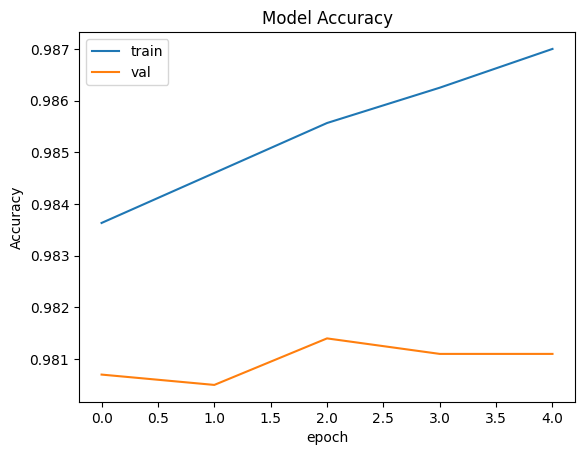

In [16]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot (val.history [ "val_accuracy"])
plt.legend(["train", "val"])
plt.show()